In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [88]:
# defining a function to draw the normal dsitribution plot
def normal_distribution_plot(df, column, color='skyblue'):
    plt.figure(figsize=(10, 8))
    sns.histplot(df[column], kde=True, stat='density', color=color)
    sns.kdeplot(df[column], color='black', linestyle='-')
    plt.title(f"Normal Distribution Plot for {column} column.")
    plt.xlabel("HCHO Reading")
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()

In [89]:
column_names = ['HCHO_Reading', 'Location', 'Current_Date', 'Next_Date'] # specifying the column names to be added to each  dataframe

In [90]:
col_mat_nuw_df = pd.read_csv("col_mat_nuw_output.csv", header=None)
col_mat_nuw_df.columns = column_names # adding the column names to the dataframe
col_mat_nuw_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Nuwara Eliya Proper,2023-12-27,2023-12-28
5474,NaN,Nuwara Eliya Proper,2023-12-28,2023-12-29
5475,NaN,Nuwara Eliya Proper,2023-12-29,2023-12-30
5476,NaN,Nuwara Eliya Proper,2023-12-30,2023-12-31


In [91]:
# converting the locations into a single word and make it uniform
col_mat_nuw_df.loc[col_mat_nuw_df['Location'] == "Colombo Proper", "Location"] = "Colombo"
col_mat_nuw_df.loc[col_mat_nuw_df['Location'] == "Deniyaya, Matara", "Location"] = "Matara"
col_mat_nuw_df.loc[col_mat_nuw_df['Location'] == "Nuwara Eliya Proper", "Location"] = "Nuwara Eliya"
col_mat_nuw_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000197,Colombo,2019-01-01,2019-01-02
1,0.000263,Colombo,2019-01-02,2019-01-03
2,0.000099,Colombo,2019-01-03,2019-01-04
3,0.000210,Colombo,2019-01-04,2019-01-05
4,0.000179,Colombo,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Nuwara Eliya,2023-12-27,2023-12-28
5474,NaN,Nuwara Eliya,2023-12-28,2023-12-29
5475,NaN,Nuwara Eliya,2023-12-29,2023-12-30
5476,NaN,Nuwara Eliya,2023-12-30,2023-12-31


In [92]:
col_mat_nuw_df.shape

(5478, 4)

In [93]:
col_mat_nuw_df.dtypes

HCHO_Reading    float64
Location         object
Current_Date     object
Next_Date        object
dtype: object

In [94]:
# changing the data types of the date columns to datetime
col_mat_nuw_df["Current_Date"] = pd.to_datetime(col_mat_nuw_df["Current_Date"])
col_mat_nuw_df["Next_Date"]  = pd.to_datetime(col_mat_nuw_df["Next_Date"])
col_mat_nuw_df.dtypes

HCHO_Reading           float64
Location                object
Current_Date    datetime64[ns]
Next_Date       datetime64[ns]
dtype: object

In [95]:
null_col_mat_nuw_df = col_mat_nuw_df[col_mat_nuw_df['HCHO_Reading'].isnull()]['HCHO_Reading']
non_null_col_mat_nuw_df = col_mat_nuw_df[col_mat_nuw_df['HCHO_Reading'].notnull()]['HCHO_Reading']

In [96]:
non_null_col_mat_nuw_df

0       0.000197
1       0.000263
2       0.000099
3       0.000210
4       0.000179
          ...   
5439    0.000036
5456   -0.000179
5459    0.000108
5463    0.000006
5469    0.000237
Name: HCHO_Reading, Length: 3059, dtype: float64

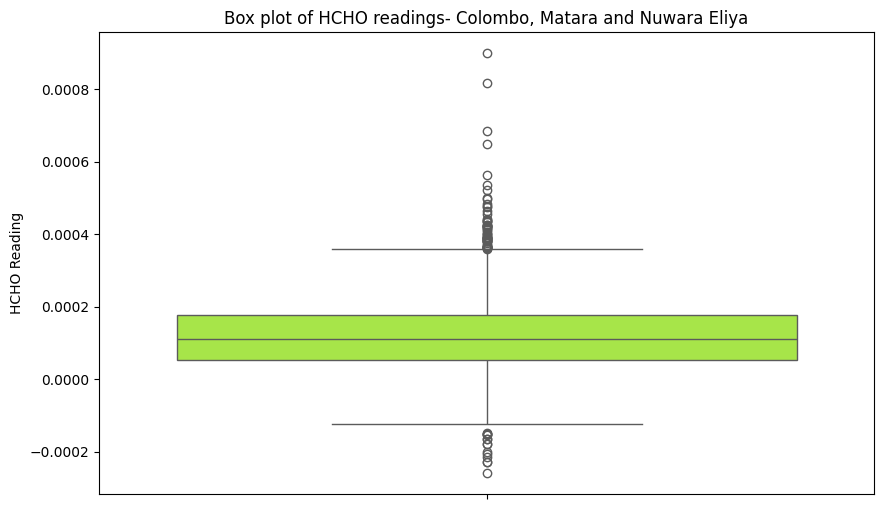

In [97]:
# let us draw a box plot to identify any possible outliers.
plt.figure(figsize=(10, 6))
sns.boxplot(data=col_mat_nuw_df, y='HCHO_Reading', color='greenyellow')
plt.title("Box plot of HCHO readings- Colombo, Matara and Nuwara Eliya")
plt.ylabel("HCHO Reading")
plt.show()

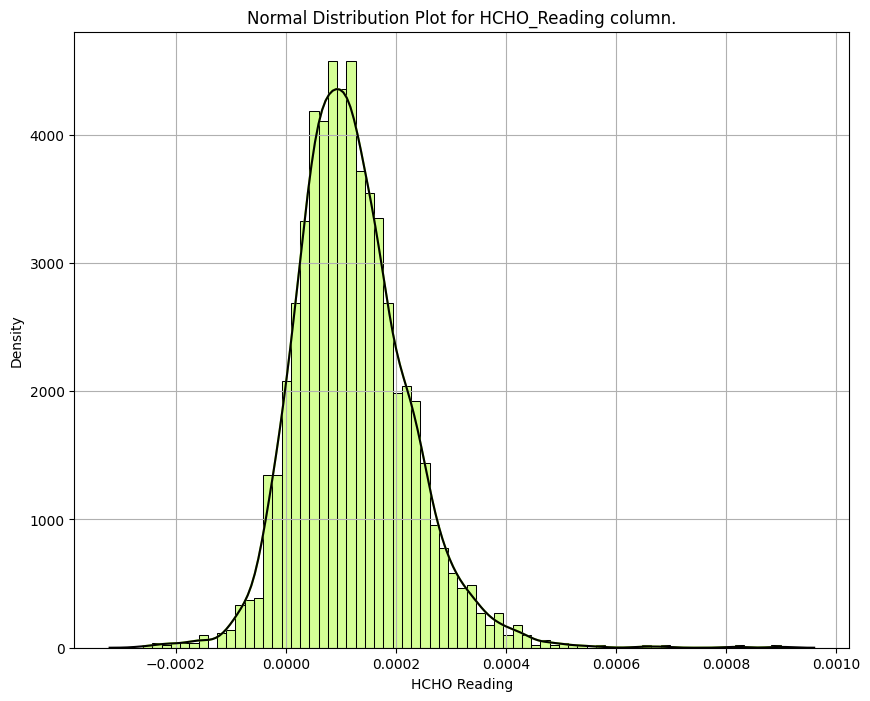

In [98]:
normal_distribution_plot(col_mat_nuw_df, 'HCHO_Reading', color='greenyellow')

In [99]:
z_scores = np.abs(stats.zscore(non_null_col_mat_nuw_df))
threshold = 3
values_without_outliers = non_null_col_mat_nuw_df[(z_scores <= threshold)]

In [100]:
col_mat_nuw_df.loc[values_without_outliers.index, 'HCHO_Reading'] = values_without_outliers

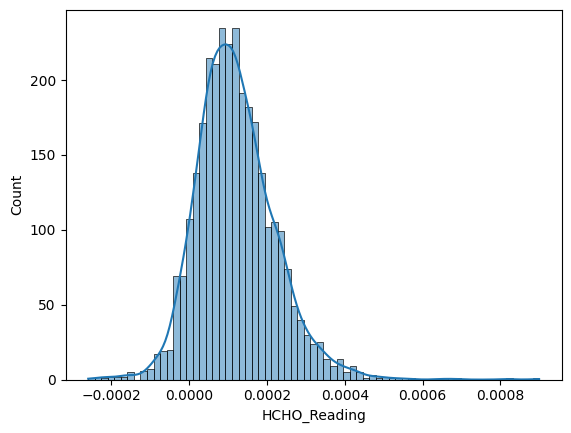

In [101]:
sns.histplot(col_mat_nuw_df['HCHO_Reading'].dropna(), kde=True)
plt.xlabel
plt.show()

In [102]:
col_mat_nuw_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000197,Colombo,2019-01-01,2019-01-02
1,0.000263,Colombo,2019-01-02,2019-01-03
2,0.000099,Colombo,2019-01-03,2019-01-04
3,0.000210,Colombo,2019-01-04,2019-01-05
4,0.000179,Colombo,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Nuwara Eliya,2023-12-27,2023-12-28
5474,NaN,Nuwara Eliya,2023-12-28,2023-12-29
5475,NaN,Nuwara Eliya,2023-12-29,2023-12-30
5476,NaN,Nuwara Eliya,2023-12-30,2023-12-31
